In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn import metrics

Using TensorFlow backend.


In [2]:
train = pd.read_csv("Data/fashion-mnist_train.csv")
test = pd.read_csv("Data/fashion-mnist_test.csv")

In [3]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [4]:
train.head()
# Each image is 28x28, therefore 784 columns, 1 for label

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Labels and their descriptions:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [5]:
# converting the dataframe to a numpy array, so as to be able to visualize
train_arr = np.array(train)
test_arr = np.array(test)
train_arr

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

9

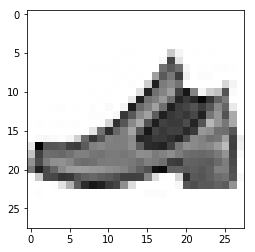

In [6]:
plt.imshow(train_arr[1, 1:].reshape(28, 28), cmap="Greys")
train_arr[1, 0]

1

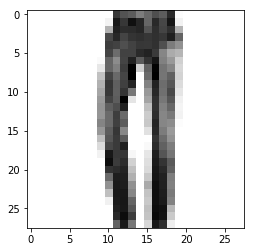

In [7]:
plt.imshow(test_arr[1, 1:].reshape(28, 28), cmap="Greys")
test_arr[1, 0]

In [8]:
train_X = train_arr[:, 1:]/255
train_y = train_arr[:, 0]

In [9]:
test_X = test_arr[:, 1:]/255
test_y = test_arr[:, 0]

In [10]:
train_X.shape

(60000, 784)

In [11]:
train_X = train_X.reshape([train_X.shape[0], 28, 28, 1])
print(train_X.shape)
test_X = test_X.reshape([test_X.shape[0], 28, 28, 1])
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
from keras.models import Sequential
from keras.layers import InputLayer, Input, Reshape, MaxPooling2D, Conv2D, Flatten, Dense, Dropout

In [13]:
from keras.optimizers import Adam
optimizer = Adam(lr=1e-3)

In [14]:
classifier = Sequential()
# classifier.add(InputLayer(input_shape=(28*28,)))
classifier.add(Conv2D(32, (2, 2), input_shape=(28, 28, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(32, (2, 2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=32, activation='relu'))
classifier.add(Dense(units=10, activation='sigmoid'))

classifier.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
%%time
history = classifier.fit(train_X, train_y, epochs=10, batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 33s 544us/step - loss: 0.7900 - acc: 0.7192
Epoch 2/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.4496 - acc: 0.8388
Epoch 3/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.4006 - acc: 0.8570
Epoch 4/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.3714 - acc: 0.8672
Epoch 5/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.3476 - acc: 0.87682s
Epoch 6/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.3312 - acc: 0.8834
Epoch 7/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.3179 - acc: 0.88671s - loss: 0
Epoch 8/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.3048 - acc: 0.8923
Epoch 9/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.2989 - acc: 0.8934
Epoch 10/10
60000/60000 [==============================] - 19s 316us

dict_keys(['acc', 'loss'])


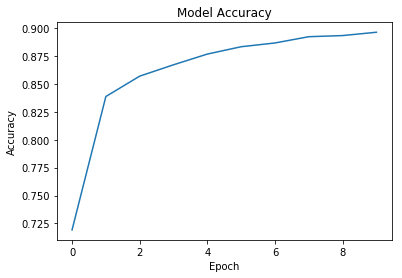

In [17]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [20]:
result = classifier.evaluate(x=test_X, y=test_y)
result[1]*100

10000/10000 [==============================] - 2s 221us/step


88.85

In [21]:
predictions = classifier.predict_classes(test_X)
predictions

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

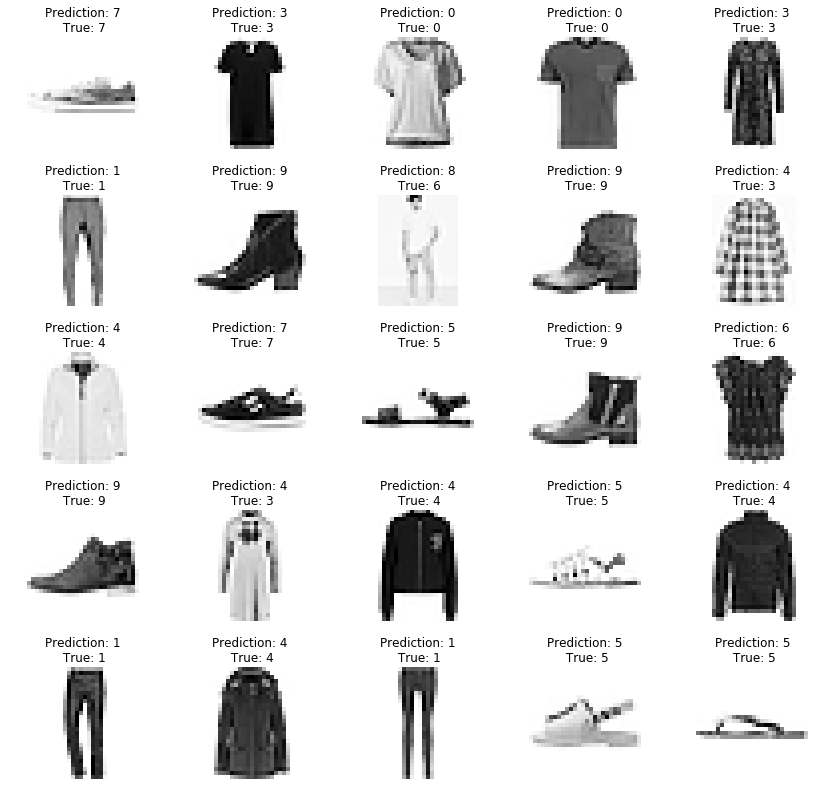

In [22]:
import random

fig, axes = plt.subplots(5, 5, figsize=(14, 14))
# axes is currently in multiple lists, ravel reshapes it to 1d (?)
axes = axes.ravel()

randnum = random.randint(0, 9975)

for i in range(25):
    axes[i].imshow(test_X[randnum + i].reshape(28, 28), cmap="Greys")
    axes[i].set_title('Prediction: %d\n True: %d' %
                      (predictions[randnum + i], test_y[randnum + i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

### Bigger ConvNet

In [23]:
classifier = Sequential()
# classifier.add(InputLayer(input_shape=(28*28,)))
classifier.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
classifier.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=10, activation='sigmoid'))

classifier.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
%%time
history = classifier.fit(train_X, train_y, epochs=25, batch_size=256)

Epoch 1/25
60000/60000 [==============================] - 35s 575us/step - loss: 1.2659 - acc: 0.5302
Epoch 2/25
60000/60000 [==============================] - 35s 578us/step - loss: 0.7261 - acc: 0.7213
Epoch 3/25
60000/60000 [==============================] - 32s 529us/step - loss: 0.6326 - acc: 0.7567
Epoch 4/25
60000/60000 [==============================] - 33s 550us/step - loss: 0.5738 - acc: 0.7822
Epoch 5/25
60000/60000 [==============================] - 33s 555us/step - loss: 0.5247 - acc: 0.8054
Epoch 6/25
60000/60000 [==============================] - 32s 538us/step - loss: 0.4797 - acc: 0.8275
Epoch 7/25
60000/60000 [==============================] - 32s 530us/step - loss: 0.4448 - acc: 0.8423
Epoch 8/25
60000/60000 [==============================] - 32s 527us/step - loss: 0.4161 - acc: 0.8541
Epoch 9/25
60000/60000 [==============================] - 32s 527us/step - loss: 0.4055 - acc: 0.8583
Epoch 10/25
60000/60000 [==============================] - 32s 526us/step - loss: 

dict_keys(['acc', 'loss'])


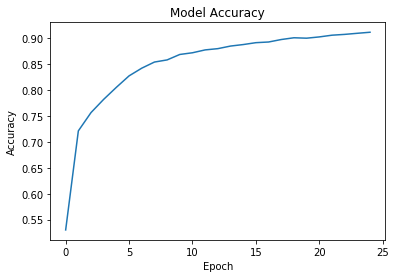

In [25]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [27]:
result = classifier.evaluate(x=test_X, y=test_y)
result[1]*100

10000/10000 [==============================] - 3s 328us/step


92.5

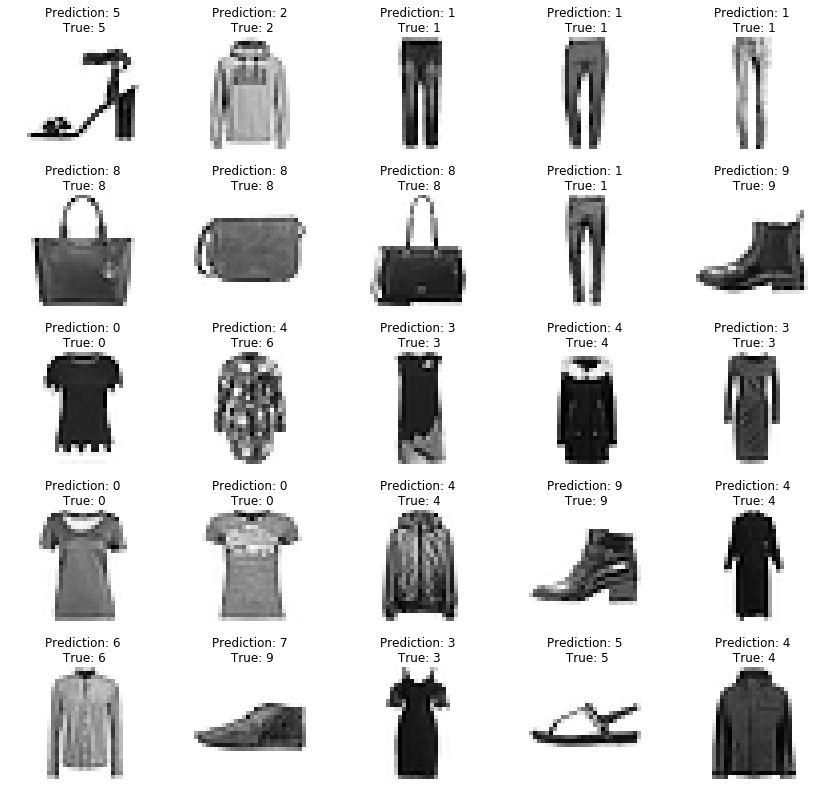

In [28]:
predictions = classifier.predict_classes(test_X)
import random

fig, axes = plt.subplots(5, 5, figsize=(14, 14))
# axes is currently in multiple lists, ravel reshapes it to 1d (?)
axes = axes.ravel()

randnum = random.randint(0, 9975)

for i in range(25):
    axes[i].imshow(test_X[randnum + i].reshape(28, 28), cmap="Greys")
    axes[i].set_title('Prediction: %d\n True: %d' %
                      (predictions[randnum + i], test_y[randnum + i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)